# Lab IV: Linear Models

### Q0
1. What makes a model “linear”? “Linear” in what?
   a model is linear if it's linear in its parameters, which can be expressed in the y = a + bx form
2. How do you interpret the coefficient for a dummy/ one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
3. Can linear regression be used for classification? Explain why, or why not.
4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?
6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

### Q1

In [6]:
import pandas as pd

nyc_data = pd.read_csv('/workspaces/DS-3021/data/Q1_clean.csv')

print(nyc_data.head())

   Price  Review Scores Rating Neighbourhood  Property Type        Room Type
0    549                  96.0      Manhattan     Apartment     Private room
1    149                 100.0       Brooklyn     Apartment  Entire home/apt
2    250                 100.0      Manhattan     Apartment  Entire home/apt
3     90                  94.0       Brooklyn     Apartment     Private room
4    270                  90.0      Manhattan     Apartment  Entire home/apt


In [7]:
print(nyc_data.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


In [8]:
nyc_data.columns = nyc_data.columns.str.strip()


In [9]:
nyc_data['Property Type'] = nyc_data['Property Type'].astype("category")
nyc_data['Room Type'] = nyc_data['Room Type'].astype("category")


In [10]:
print(nyc_data.dtypes)

Price                      int64
Review Scores Rating     float64
Neighbourhood             object
Property Type           category
Room Type               category
dtype: object


#### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [20]:
# Group by 'Neighborhood' and calculate mean price and review scores
neighborhood_stats = nyc_data.groupby('Neighbourhood').agg({
    'Price': 'mean',
    'Review Scores Rating': 'mean'
}).reset_index()
neighborhood_stats.columns = ['Neighbourhood', 'Average Price', 'Average Review Score']
print(neighborhood_stats)

   Neighbourhood  Average Price  Average Review Score
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


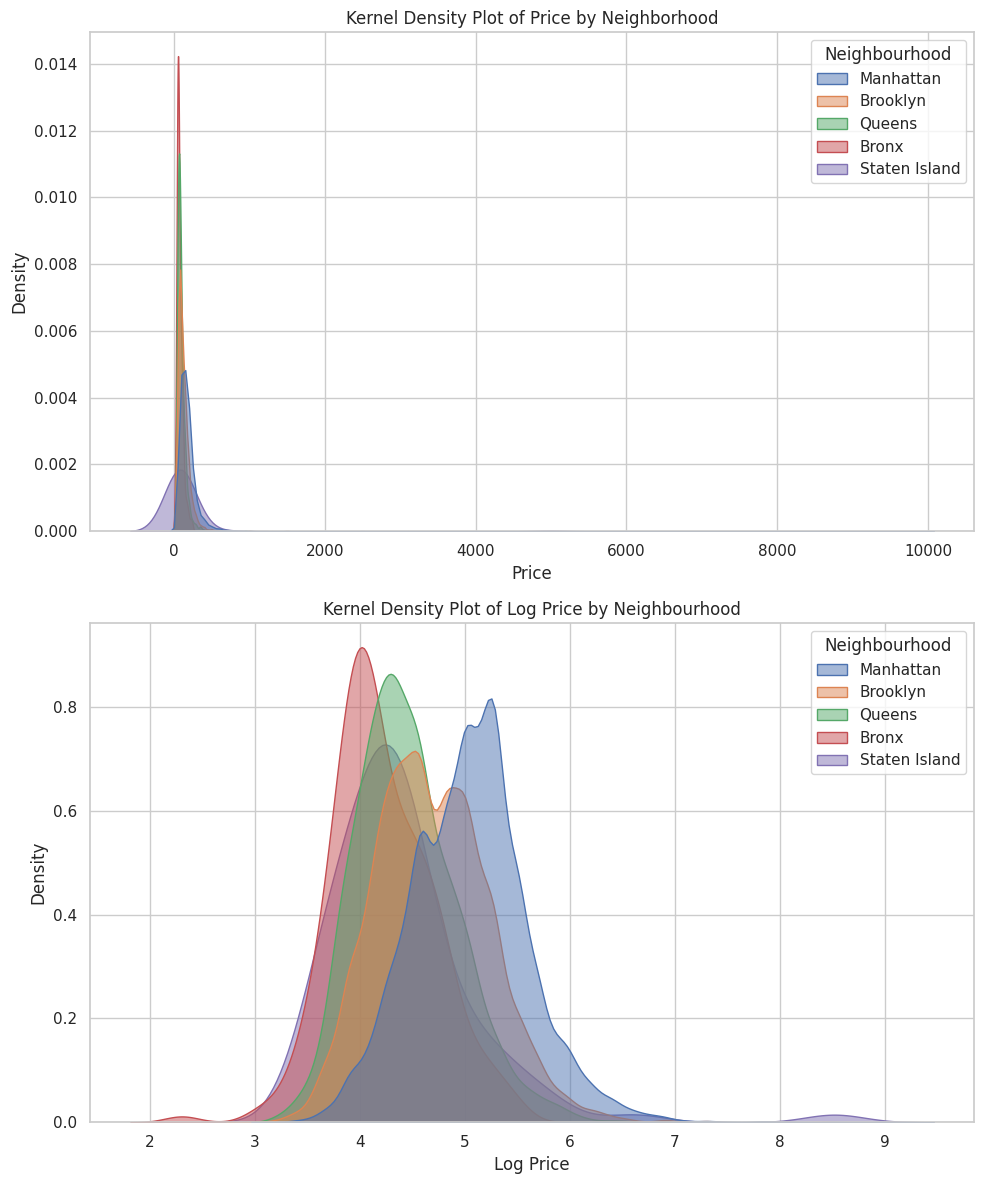

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nyc_data['Log Price'] = np.log(nyc_data['Price'])
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Kernel density plot for Price
sns.kdeplot(data=nyc_data, x="Price", hue="Neighbourhood", fill=True, common_norm=False, alpha=0.5, ax=axes[0])
axes[0].set_title('Kernel Density Plot of Price by Neighborhood')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Kernel density plot for Log Price
sns.kdeplot(data=nyc_data, x="Log Price", hue="Neighbourhood", fill=True, common_norm=False, alpha=0.5, ax=axes[1])
axes[1].set_title('Kernel Density Plot of Log Price by Neighbourhood')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

#### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [22]:
import statsmodels.api as sm

# Create dummy variables for Neighborhood without dropping the first category
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=False)
# Fit the model without an intercept
model_no_intercept = sm.OLS(nyc_data['Price'], neighborhood_dummies).fit()
print(model_no_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        05:09:46   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

In [23]:
# Create one-hot encoded variables for 'Neighborhood' without an intercept
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=False)

# Add the one-hot encoded variables to the DataFrame
nyc_data = pd.concat([nyc_data, neighborhood_dummies], axis=1)
X = neighborhood_dummies
y = nyc_data['Price']

# linear regression without an intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        05:10:20   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

#### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [24]:
# Create one-hot encoded variables for 'Neighborhood' with drop_first=True to drop the first category
neighborhood_dummies = pd.get_dummies(nyc_data['Neighbourhood'], drop_first=True)
neighborhood_dummies = neighborhood_dummies.astype(int)

# Define the independent variables (one-hot encoded neighborhoods)
X = neighborhood_dummies
# Add a constant (intercept) to the model
X = sm.add_constant(X)
y = nyc_data['Price']

X = X.dropna()
y = y.dropna()
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# linear regression with an intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        05:11:49   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628

#### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(nyc_data, test_size=0.2, random_state=42)

# One-hot encode 'Neighborhood' only (remove 'Property Type')
train_dummies_neighborhood = pd.get_dummies(train_data['Neighbourhood'], drop_first=True).astype(int)
test_dummies_neighborhood = pd.get_dummies(test_data['Neighbourhood'], drop_first=True).astype(int)

# Define the independent variables (only Review Scores Rating + Neighborhood)
X_train = pd.concat([train_data['Review Scores Rating'], train_dummies_neighborhood], axis=1)
X_test = pd.concat([test_data['Review Scores Rating'], test_dummies_neighborhood], axis=1)

# Add a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ensure test set has the same columns as train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Define dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Ensure all data types are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

# Drop NaNs from X_train and realign y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Linear regression with an intercept
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE on the test set
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

# Coefficient on Review Scores Rating
coef_review_scores_rating = model.params.get('Review Scores Rating', None)
print(f'Coefficient on Review Scores Rating: {coef_review_scores_rating}')

# Find the most expensive neighborhood (instead of property type)
common_columns = list(set(model.params.index) & set(train_dummies_neighborhood.columns))
if common_columns:
    neighborhood_coefficients = model.params[common_columns]
    most_expensive_neighborhood = neighborhood_coefficients.idxmax()
    print(f'Most expensive neighborhood: {most_expensive_neighborhood}')
else:
    print("No neighborhood coefficients were found in the model parameters.")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.33e-197
Time:                        05:21:23   Log-Likelihood:            -1.1348e+05
No. Observations:               17722   AIC:                         2.270e+05
Df Residuals:                   17716   BIC:                         2.270e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -35.1573 

#### 5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [29]:
# One-hot encode 'Property Type' in addition to 'Neighborhood'
train_dummies_property_type = pd.get_dummies(train_data['Property Type'], drop_first=True).astype(int)
test_dummies_property_type = pd.get_dummies(test_data['Property Type'], drop_first=True).astype(int)

# Add 'Property Type' to the independent variables
X_train = pd.concat([X_train, train_dummies_property_type], axis=1)
X_test = pd.concat([X_test, test_dummies_property_type], axis=1)

# Ensure test set has the same columns as train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train and evaluate the model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')

# Find the most expensive property type instead of neighborhood
common_columns = list(set(model.params.index) & set(train_dummies_property_type.columns))
if common_columns:
    property_type_coefficients = model.params[common_columns]
    most_expensive_property_type = property_type_coefficients.idxmax()
    print(f'Most expensive kind of property you can rent: {most_expensive_property_type}')
else:
    print("No property type coefficients were found in the model parameters.")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.46
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.52e-218
Time:                        05:22:17   Log-Likelihood:            -1.1339e+05
No. Observations:               17722   AIC:                         2.268e+05
Df Residuals:                   17699   BIC:                         2.270e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -49.2960 

#### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

Since the coefficient on Review Scores Rating changes from Part 4 to Part 5 , it indicates that Property Type was a confounding variable affecting the relationship between Review Scores Rating and Price. In multiple linear regression, when a new independent variable (Property Type) is added, the model redistributes explanatory power among predictors, adjusting their coefficients accordingly. This means that in Part 4, the effect of Review Scores Rating on Price may have been overestimated due to missed variable bias, where Property Type was indirectly influencing Price. In Part 5, the model isolates the independent impact of Review Scores Rating, leading to a more accurate and adjusted coefficient that reflects its true relationship with Price.

### Q2. This question is a case study for linear models. The data are about car prices. In particular, they include:

- Price, Color, Seating_Capacity
- Body_Type: crossover, hatchback, muv, sedan, suv
- Make, Make_Year: The brand of car and year produced
- Mileage_Run: The number of miles on the odometer
- Fuel_Type: Diesel or gasoline/petrol
- Transmission, Transmission_Type: speeds and automatic/manual

#### 1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [37]:
cars_data = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

print(cars_data.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


#### 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

Summary of Price variable:
count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

Summary of Prices by Make:
               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
M

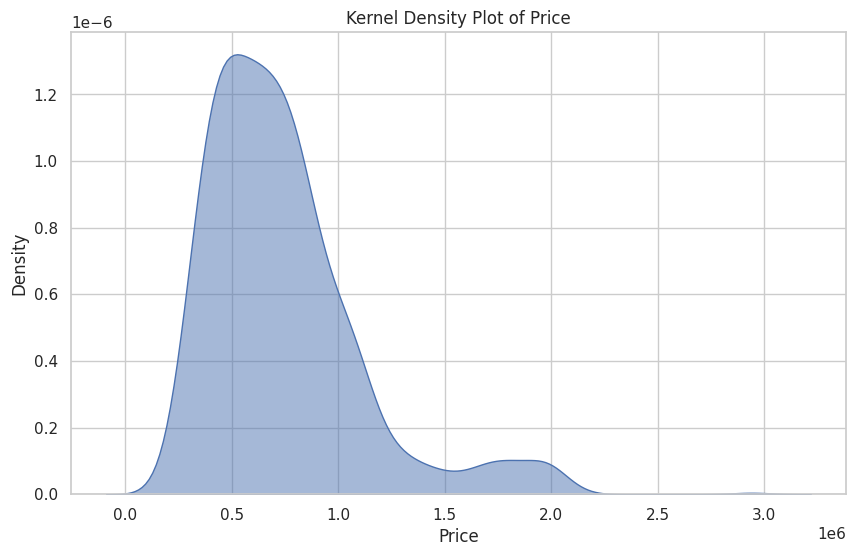

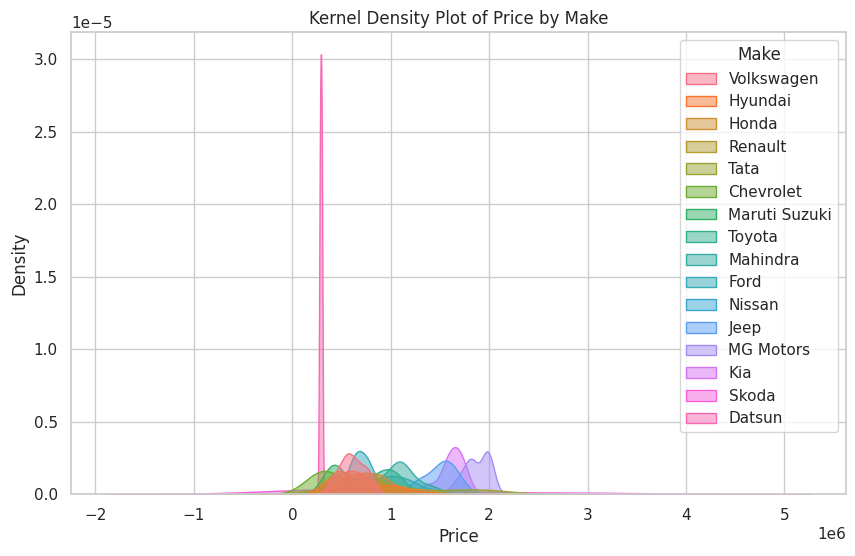

In [38]:
# Summarize the Price variable
price_summary = cars_data['Price'].describe()
print("Summary of Price variable:")
print(price_summary)

# Summarize prices by brand (Make)
price_by_make_summary = cars_data.groupby('Make')['Price'].describe()
print("\nSummary of Prices by Make:")
print(price_by_make_summary)

# Create a kernel density plot for Price
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cars_data, x="Price", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Create a grouped kernel density plot by Make
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cars_data, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Price by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

#### 3. Split the data into an 80% training set and a 20% testing set.

In [39]:
# Split the data into an 80/20 training and test set
train_data, test_data = train_test_split(cars_data, test_size=0.2, random_state=42)

# Summarize the Price variable in the training set
price_summary = train_data['Price'].describe()
print("Summary of Price variable in the training set:")
print(price_summary)

# Summarize prices by brand (Make) in the training set
price_by_make_summary = train_data.groupby('Make')['Price'].describe()
print("\nSummary of Prices by Make in the training set:")
print(price_by_make_summary)



Summary of Price variable in the training set:
count    7.800000e+02
mean     7.481974e+05
std      3.738446e+05
min      1.880000e+05
25%      4.817500e+05
50%      6.715000e+05
75%      8.867500e+05
max      2.941000e+06
Name: Price, dtype: float64

Summary of Prices by Make in the training set:
               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        5.0  4.908000e+05  2.560931e+05   273000.0   335000.0   
Datsun           1.0  2.900000e+05           NaN   290000.0   290000.0   
Ford            35.0  7.337143e+05  1.374434e+05   521000.0   639000.0   
Honda           62.0  7.788065e+05  2.567049e+05   316000.0   578500.0   
Hyundai        255.0  6.948431e+05  2.752285e+05   248000.0   494000.0   
Jeep             3.0  1.569333e+06  7.503555e+04  1500000.0  1529500.0   
Kia              7.0  1.601429e+06  1.219861e+05  1369000.0  1569000.0   
MG Motors       31.0  1.861774e+06 

#### 4. Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [66]:
# MODEL 1
# Select numeric variables
numeric_vars = train_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('Price')  # Exclude dependent variable

X_train_numeric = train_data[numeric_vars]
X_test_numeric = test_data[numeric_vars]
y_train = train_data['Price']
y_test = test_data['Price']

# Add an intercept
X_train_numeric = sm.add_constant(X_train_numeric)
X_test_numeric = sm.add_constant(X_test_numeric)
# Train the model
model_numeric = sm.OLS(y_train, X_train_numeric).fit()

# Predict and evaluate
y_train_pred_numeric = model_numeric.predict(X_train_numeric)
y_test_pred_numeric = model_numeric.predict(X_test_numeric)
r2_train_numeric = model_numeric.rsquared
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))

# MODEL 2
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()
train_dummies = pd.get_dummies(train_data[categorical_vars], drop_first=True)
test_dummies = pd.get_dummies(test_data[categorical_vars], drop_first=True)

test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)
X_train_categorical = sm.add_constant(train_dummies)
X_test_categorical = sm.add_constant(test_dummies)

# Convert boolean columns to integers
X_train_categorical = X_train_categorical.astype(int)
X_test_categorical = X_test_categorical.astype(int)

# Train
model_categorical = sm.OLS(y_train.loc[X_train_categorical.index], X_train_categorical).fit()

# Predict 
y_test_pred_categorical = model_categorical.predict(X_test_categorical)

r2_test_categorical = r2_score(y_test, y_test_pred_categorical)
rmse_test_categorical = np.sqrt(mean_squared_error(y_test, y_test_pred_categorical))

# MODEL 3
# Combine numeric and categorical features
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

X_test_combined = X_test_combined.reindex(columns=X_train_combined.columns, fill_value=0)
model_combined = sm.OLS(y_train.loc[X_train_combined.index], X_train_combined).fit()

# Predict 
y_test_pred_combined = model_combined.predict(X_test_combined)

r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_test_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))
results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3"],
    "R^2 (Test)": [r2_test_numeric, r2_test_categorical, r2_test_combined],
    "RMSE (Test)": [rmse_test_numeric, rmse_test_categorical, rmse_test_combined]
})
print(results.to_markdown(index=False))


| Model   |   R^2 (Test) |   RMSE (Test) |
|:--------|-------------:|--------------:|
| Model 1 |     0.290882 |        285189 |
| Model 2 |     0.708684 |        182791 |
| Model 3 |     0.816391 |        145118 |


#### 5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R^2 and RMSE change? At what point does R^2 go negative on the test set? For your best model with expanded features, what is the R^2 and RMSE? How does it compare to your best model from part 4?

In [67]:
from sklearn.preprocessing import PolynomialFeatures
# Define the maximum degree to test
max_degree = 5
results_poly = []

# Iterate through polynomial degrees
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)
    X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train_numeric.columns), index=X_train_numeric.index)
    X_test_poly = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test_numeric.columns), index=X_test_numeric.index)
    X_train_poly = sm.add_constant(X_train_poly)
    X_test_poly = sm.add_constant(X_test_poly)

    y_train_aligned = y_train.loc[X_train_poly.index]
    model_poly = sm.OLS(y_train_aligned, X_train_poly).fit()
    y_test_pred_poly = model_poly.predict(X_test_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
    
    # Store results
    results_poly.append({"Degree": degree, "R^2 (Test)": r2_test_poly, "RMSE (Test)": rmse_test_poly})
    
    # Stop if R² goes negative
    if r2_test_poly < 0:
        break

# Convert results to DataFrame
results_poly_df = pd.DataFrame(results_poly)

print(results_poly_df)


   Degree  R^2 (Test)    RMSE (Test)
0       1    0.290882  285188.671858
1       2    0.327184  277792.996700
2       3    0.339523  275233.897790
3       4    0.284027  286563.884117
4       5    0.179643  306742.904849


#### 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

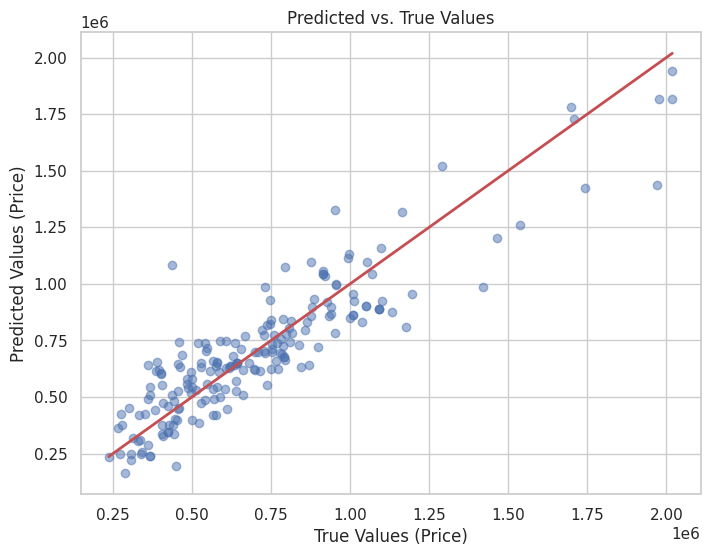

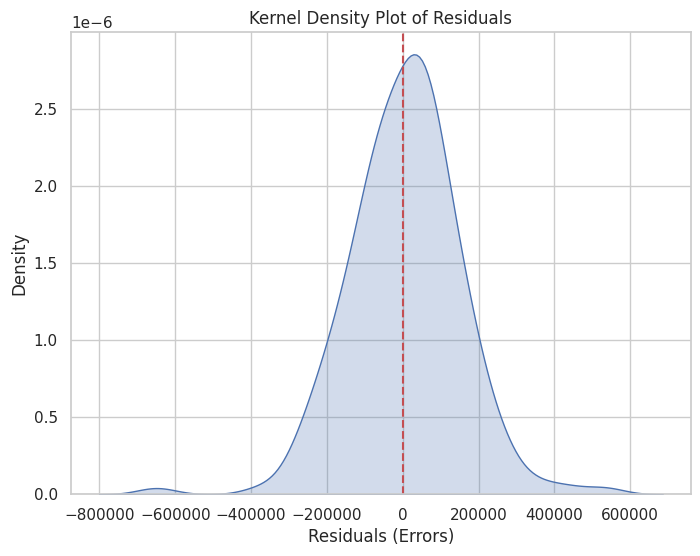

{'R^2 (Test)': 0.816391058390399, 'RMSE (Test)': np.float64(145117.59426377024), 'Residual Mean': np.float64(5053.202690216476), 'Residual Std Dev': np.float64(145400.98289558207)}


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the best model based on highest R^2 (assumed to be the combined model)
best_model = model_combined
y_test_pred_best = best_model.predict(X_test_combined)

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Diagonal line
plt.xlabel("True Values (Price)")
plt.ylabel("Predicted Values (Price)")
plt.title("Predicted vs. True Values")
plt.show()

# Compute residuals (errors) and drop NaN values
residuals = y_test - y_test_pred_best
residuals = residuals.dropna()  # Remove NaN values


# Kernel density plot of residuals
plt.figure(figsize=(8,6))
sns.kdeplot(residuals.astype(float), fill=True)  # Ensure numeric
plt.axvline(x=0, color='r', linestyle='--')  # Vertical line at zero
plt.xlabel("Residuals (Errors)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()

# Evaluate model strengths and weaknesses
evaluation = {
    "R^2 (Test)": r2_test_combined,
    "RMSE (Test)": rmse_test_combined,
    "Residual Mean": residuals.mean(),
    "Residual Std Dev": residuals.std()
}

print(evaluation)


### Q3

#### 1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.

In [35]:
import pandas as pd
shark_data = pd.read_csv('/workspaces/DS-3021/data/global_shark_attacks.csv')

print(shark_data.head())

         date    year        type    country                area  \
0  2023-05-13  2023.0  Unprovoked  AUSTRALIA     South Australia   
1  2023-04-29  2023.0  Unprovoked  AUSTRALIA   Western Australia   
2  2022-10-07  2022.0  Unprovoked  AUSTRALIA  Western  Australia   
3  2021-10-04  2021.0  Unprovoked        USA             Florida   
4  2021-10-03  2021.0  Unprovoked        USA             Florida   

                                   location      activity                name  \
0                                  Elliston       Surfing    Simon Baccanello   
1                      Yallingup, Busselton      Swimming                male   
2                              Port Hedland  Spearfishing         Robbie Peck   
3  Fort Pierce State Park, St. Lucie County       Surfing  Truman Van Patrick   
4               Jensen Beach, Martin County      Swimming                male   

  sex   age fatal_y_n   time      species  
0   M    46         Y  10h10  White shark  
1   M   NaN     

#### 2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [25]:
shark_info = shark_data.info()
shark_head = shark_data.head()
shark_columns = shark_data.columns
shark_summary = shark_data.describe()

shark_info, shark_head, shark_columns, shark_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   name       6670 non-null   object 
 8   sex        6318 non-null   object 
 9   age        3903 non-null   object 
 10  fatal_y_n  6890 non-null   object 
 11  time       3372 non-null   object 
 12  species    3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.9+ KB


(None,
          date    year        type    country                area  \
 0  2023-05-13  2023.0  Unprovoked  AUSTRALIA     South Australia   
 1  2023-04-29  2023.0  Unprovoked  AUSTRALIA   Western Australia   
 2  2022-10-07  2022.0  Unprovoked  AUSTRALIA  Western  Australia   
 3  2021-10-04  2021.0  Unprovoked        USA             Florida   
 4  2021-10-03  2021.0  Unprovoked        USA             Florida   
 
                                    location      activity                name  \
 0                                  Elliston       Surfing    Simon Baccanello   
 1                      Yallingup, Busselton      Swimming                male   
 2                              Port Hedland  Spearfishing         Robbie Peck   
 3  Fort Pierce State Park, St. Lucie County       Surfing  Truman Van Patrick   
 4               Jensen Beach, Martin County      Swimming                male   
 
   sex   age fatal_y_n   time      species  
 0   M    46         Y  10h10  White s

/tmp/ipykernel_40515/3332751695.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fatal_y_n', data=shark_data_cleaned, palette='coolwarm')


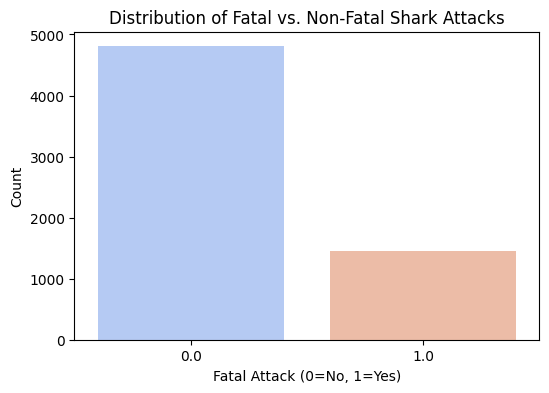

            date    year          type       country                area  \
0     2023-05-13  2023.0    unprovoked     australia     south australia   
1     2023-04-29  2023.0    unprovoked     australia   western australia   
2     2022-10-07  2022.0    unprovoked     australia  western  australia   
3     2021-10-04  2021.0    unprovoked           usa             florida   
4     2021-10-03  2021.0    unprovoked           usa             florida   
...          ...     ...           ...           ...                 ...   
6885         NaN     NaN  sea disaster        greece        off thessaly   
6886         NaN     NaN    unprovoked     indonesia       riau province   
6887         NaN     NaN    unprovoked          iraq              basrah   
6888         NaN     NaN    unprovoked  south africa       kwazulu-natal   
6889         NaN     NaN    unprovoked     australia   western australia   

                                               location  \
0                           

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = shark_data.isnull().sum()
shark_data_cleaned = shark_data.dropna(axis=1, thresh=len(shark_data) * 0.5)  # Drop columns with more than 50% missing
# Convert categorical variables to lowercase and strip spaces for consistency
shark_data_cleaned = shark_data_cleaned.apply(lambda x: x.str.lower().str.strip() if x.dtype == "O" else x)

# Target variable: 'fatal_y_n' (whether the attack was fatal)
# Predictors: 'year', 'country', 'activity', 'sex', 'age', 'type'

# Convert 'fatal_y_n' to binary format (0 = No, 1 = Yes)
shark_data_cleaned['fatal_y_n'] = shark_data_cleaned['fatal_y_n'].map({'y': 1, 'n': 0})
# Convert 'year' to numeric
shark_data_cleaned['year'] = pd.to_numeric(shark_data_cleaned['year'], errors='coerce')
shark_data_cleaned = shark_data_cleaned.dropna(subset=['fatal_y_n'])
plt.figure(figsize=(6,4))
sns.countplot(x='fatal_y_n', data=shark_data_cleaned, palette='coolwarm')
plt.xlabel("Fatal Attack (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Distribution of Fatal vs. Non-Fatal Shark Attacks")
plt.show()

print(shark_data_cleaned)


#### 3. Split the sample into an ~80% training set and a ~20% test set.

In [27]:
from sklearn.model_selection import train_test_split

target = 'fatal_y_n'
predictors = ['year', 'country', 'activity', 'species', 'sex', 'age', 'type']

shark_model_data = shark_data_cleaned.dropna(subset=predictors)
train_data, test_data = train_test_split(shark_model_data, test_size=0.2, random_state=42)

train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size


(1703, 426)

#### 4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# use df so it's easier
df = pd.read_csv('/workspaces/DS-3021/data/global_shark_attacks.csv')
df = df[['country', 'sex', 'activity', 'fatal_y_n']].copy()
df.dropna(subset=['country', 'sex', 'activity', 'fatal_y_n'], inplace=True)

df['fatal_y_n'] = df['fatal_y_n'].apply(lambda x: 1 if str(x).strip().upper()=='Y' 
                                          else (0 if str(x).strip().upper()=='N' else np.nan))
df.dropna(subset=['fatal_y_n'], inplace=True)

# Model 1 (use country, sex, and activity)
# One-hot encode the categorical predictors for the full model
X_full = pd.get_dummies(df[['country', 'sex', 'activity']], drop_first=True)
y = df['fatal_y_n']
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

model_full = LinearRegression()
model_full.fit(X_train, y_train)

preds_full = model_full.predict(X_test)
rmse_full = np.sqrt(mean_squared_error(y_test, preds_full))
print("Model 1 - RMSE: {:.4f}".format(rmse_full))


Model with country, sex, and activity - RMSE: 0.3862


In [ ]:
# Model 2 (use country and sex only)
X_subset = pd.get_dummies(df[['country', 'sex']], drop_first=True)
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y, test_size=0.2, random_state=42)

model_subset = LinearRegression()
model_subset.fit(X_train_subset, y_train_subset)

preds_subset = model_subset.predict(X_test_subset)
rmse_subset = np.sqrt(mean_squared_error(y_test_subset, preds_subset))
print("Model 2 - RMSE: {:.4f}".format(rmse_subset))

Model with country and sex - RMSE: 0.3967


#### 5. Which model performed the best, and why?

the model that includes country, sex, and activity has a lower RMSE compared to the model using only country and sex, therefore it is considered to perform better. This indicates that the additional predictor (activity) provides extra information that improves the prediction of the outcome, reducing the average prediction error.

#### 6. What did you learn?

In this lab, I learned how to build linear regression models using real-world data. I focused on predicting a binary outcome by using a predictors—country, sex, and activity. I also handled missing values and converted categorical variables through one-hot encoding. I gained practical experience in splitting the dataset into training and testing sets to assess model performance objectively. By comparing models that used different combinations of predictors and calculating the RMSE for each, I learned that the model with the lowest RMSE on the test set is generally preferred, because this indicates better predictive accuracy.